In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import os
import time
import numpy

In [3]:
from ipyparallel import Client

In [4]:
cli = Client()

In [5]:
cli.ids

[0, 1, 2, 3]

In [6]:
def hostname():
    import os
    return os.environ['HOSTNAME']

In [7]:
hostname()

'nbviewer-228ba-46ae3-1-xk8z3'

In [8]:
cli[:].apply_sync(hostname)

['ipengine-46ae3-1-sqmpi',
 'ipengine-46ae3-1-omi0x',
 'ipengine-46ae3-1-rbtx3',
 'ipengine-46ae3-1-gs6z3']

In [9]:
dview = cli[:]

In [10]:
@dview.parallel(block=True)
def dummy_task(delay):
    """ a dummy task that takes 'delay' seconds to finish """
    import os, time

    t0 = time.time()
    hostname = os.environ['HOSTNAME']
    time.sleep(delay)
    t1 = time.time()
    
    return [hostname, t0, t1]

In [11]:
delay_times = numpy.random.rand((len(cli.ids)))

In [12]:
dummy_task.map(delay_times)

[['ipengine-46ae3-1-sqmpi', 1450325484.694289, 1450325484.714024],
 ['ipengine-46ae3-1-omi0x', 1450325484.960086, 1450325485.195587],
 ['ipengine-46ae3-1-rbtx3', 1450325484.9646, 1450325485.325554],
 ['ipengine-46ae3-1-gs6z3', 1450325484.965222, 1450325485.574295]]

In [13]:
def visualize_tasks(results):
    res = numpy.array(results)
    fig, ax = plt.subplots(figsize=(10, res.shape[1]))
    
    yticks = []
    yticklabels = []
    tmin = float(min(res[:,1]))
    print(tmin)
    for n, hostname in enumerate(numpy.unique(res[:,0])):
        yticks.append(n)
        yticklabels.append("%s" % hostname)
        for m in numpy.where(res[:,0] == hostname)[0]:
            pass
            ax.add_patch(plt.Rectangle((float(res[m,1]) - tmin, n-0.25),
                         float(res[m,2]) - float(res[m,1]), 0.5, color="green", alpha=0.5))
        
    ax.set_ylim(-.5, n+.5)
    ax.set_xlim(0, float(max(res[:,2])) - tmin + 0.)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)
    ax.set_ylabel("PID")
    ax.set_xlabel("seconds")

In [14]:
delay_times = numpy.random.rand(64)

1450325493.15


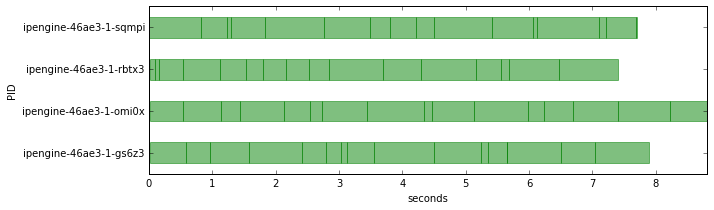

In [15]:
result = dummy_task.map(delay_times)
visualize_tasks(result)

In [16]:
lbview = cli.load_balanced_view()

In [17]:
@lbview.parallel(block=True)
def dummy_task_load_balanced(delay):
    """ a dummy task that takes 'delay' seconds to finish """
    import os, time

    t0 = time.time()
    hostname = os.environ['HOSTNAME']
    time.sleep(delay)
    t1 = time.time()
    
    return [hostname, t0, t1]

1450325512.52


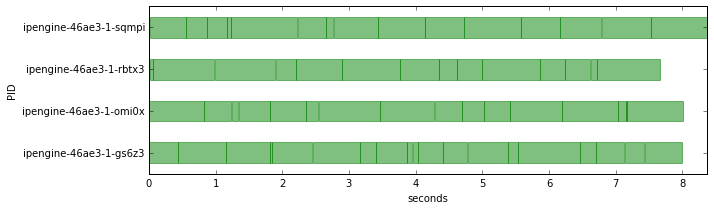

In [18]:
result = dummy_task_load_balanced.map(delay_times)
visualize_tasks(result)